In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file_path = "E:\\D_S_project\\linear_regressioin\\data\\raw\\household.csv"
df = pd.read_csv(file_path)

In [3]:
df.shape

(10000, 14)

In [4]:
household_data = df.copy()

In [5]:
household_data.shape

(10000, 14)

In [6]:
household_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             10000 non-null  int64 
 1   Education_Level                 10000 non-null  object
 2   Occupation                      10000 non-null  object
 3   Number_of_Dependents            10000 non-null  int64 
 4   Location                        10000 non-null  object
 5   Work_Experience                 10000 non-null  int64 
 6   Marital_Status                  10000 non-null  object
 7   Employment_Status               10000 non-null  object
 8   Household_Size                  10000 non-null  int64 
 9   Homeownership_Status            10000 non-null  object
 10  Type_of_Housing                 10000 non-null  object
 11  Gender                          10000 non-null  object
 12  Primary_Mode_of_Transportation  10000 non-null 

In [7]:
ty = household_data.Age.dtype.name
ty in "object"

False

In [8]:
household_data.duplicated().sum()

np.int64(0)

In [9]:
cat = []

for col in household_data.columns:
    if len(household_data[col].unique()) <= 7 and household_data[col].dtype.name in "object":
        print(col)
        cat.append(col)
        household_data[col] = household_data[col].astype('category')
        

cat

Education_Level
Occupation
Location
Marital_Status
Employment_Status
Homeownership_Status
Type_of_Housing
Gender
Primary_Mode_of_Transportation


['Education_Level',
 'Occupation',
 'Location',
 'Marital_Status',
 'Employment_Status',
 'Homeownership_Status',
 'Type_of_Housing',
 'Gender',
 'Primary_Mode_of_Transportation']

In [10]:
household_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Age                             10000 non-null  int64   
 1   Education_Level                 10000 non-null  category
 2   Occupation                      10000 non-null  category
 3   Number_of_Dependents            10000 non-null  int64   
 4   Location                        10000 non-null  category
 5   Work_Experience                 10000 non-null  int64   
 6   Marital_Status                  10000 non-null  category
 7   Employment_Status               10000 non-null  category
 8   Household_Size                  10000 non-null  int64   
 9   Homeownership_Status            10000 non-null  category
 10  Type_of_Housing                 10000 non-null  category
 11  Gender                          10000 non-null  category
 12  Primary_Mode_of_Tra

In [11]:
from sklearn.preprocessing import OrdinalEncoder

columns = household_data.columns
# # print(columns)
column_1 = household_data['Education_Level'].unique()
# print(column_1)

for feature in cat:
    category = [list(household_data[feature].unique())]
    od_en = OrdinalEncoder(categories = category)
    print(category)
    en_arr = np.array(household_data[feature]).reshape(-1,1)
    # print(en_arr)
    household_data[feature] = od_en.fit_transform(en_arr)
    # print(household_data[feature])
    
    # for cat_val in category:
    #     print(household_data[cat_val])
    #     pass
    

    print('\n')

# household_data|

[["Master's", 'High School', "Bachelor's", 'Doctorate']]


[['Technology', 'Finance', 'Others', 'Education', 'Healthcare']]


[['Urban', 'Rural', 'Suburban']]


[['Married', 'Single', 'Divorced']]


[['Full-time', 'Self-employed', 'Part-time']]


[['Own', 'Rent']]


[['Apartment', 'Single-family home', 'Townhouse']]


[['Male', 'Female']]


[['Public transit', 'Biking', 'Car', 'Walking']]




In [12]:
# plt.figure(figsize= (15,15))
# sns.pairplot(household_data)
# plt.savefig('E:\\D_S_project\\linear_regressioin\\visualization\\pairplot of household data after ordinal encoding.png' ,dpi = 300 , bbox_inches = 'tight' )
# plt.show()

In [13]:
household_data


Age  Education_Level  Occupation  Number_of_Dependents  Location  \
0      56              0.0         0.0                     5       0.0   
1      69              1.0         1.0                     0       0.0   
2      46              2.0         0.0                     1       0.0   
3      32              1.0         2.0                     2       0.0   
4      60              2.0         1.0                     3       0.0   
...   ...              ...         ...                   ...       ...   
9995   58              1.0         2.0                     0       2.0   
9996   23              0.0         0.0                     3       0.0   
9997   41              3.0         3.0                     3       0.0   
9998   44              1.0         3.0                     0       0.0   
9999   37              1.0         4.0                     0       2.0   

      Work_Experience  Marital_Status  Employment_Status  Household_Size  \
0                  21             0.0                0.0               7   
1                   4             1.0                0.0               7   
2                   1             1.0                0.0               7   
3                  32             0.0                0.0               1   
4                  15             0.0                1.0               4   
...               ...             ...                ...             ...   
9995               26             2.0                0.0               6   
9996               16             2.0                0.0               1   
9997               50             1.0                0.0               4   
9998                3             0.0                2.0               1   
9999               48             0.0                2.0               7   

      Homeownership_Status  Type_of_Housing  Gender  \
0                      0.0              0.0     0.0   
1                      0.0              0.0     0.0   
2                      0.0              1.0     1.0   
3                      0.0              0.0     1.0   
4                      0.0              2.0     0.0   
...                    ...              ...     ...   
9995                   0.0              2.0     1.0   
9996                   0.0              1.0     1.0   
9997                   0.0              1.0     1.0   
9998                   0.0              1.0     0.0   
9999                   1.0              1.0     0.0   

      Primary_Mode_of_Transportation   Income  
0                                0.0    72510  
1                                1.0    75462  
2                                2.0    71748  
3                                2.0    74520  
4                                3.0   640210  
...                              ...      ...  
9995                             2.0    74994  
9996                             1.0    72676  
9997                             0.0  2684820  
9998                             1.0    57955  
9999                             0.0  1131084  

[10000 rows x 14 columns]

In [14]:
# plt.figure(figsize= (15,15))
# sns.heatmap(household_data.corr(),annot =  True)
# plt.savefig('E:\\D_S_project\\linear_regressioin\\visualization\\heatmap of household data after ordinal encoding.png' ,dpi = 300 , bbox_inches = 'tight' )
# plt.show()

In [15]:
household_data.corr()['Income']

Age                               0.008739
Education_Level                  -0.010265
Occupation                        0.004411
Number_of_Dependents              0.011413
Location                          0.044232
Work_Experience                  -0.027541
Marital_Status                   -0.012465
Employment_Status                 0.028091
Household_Size                   -0.011356
Homeownership_Status              0.062561
Type_of_Housing                  -0.026367
Gender                            0.002218
Primary_Mode_of_Transportation   -0.005264
Income                            1.000000
Name: Income, dtype: float64

In [16]:
from sklearn.decomposition import PCA                                                       

fig printed
fig printed
fig printed
fig printed
fig printed
fig printed


OSError: [Errno 22] Invalid argument: 'E:\\D_S_project\\linear_regressioin\\visualization\\pca_6.png'

<Figure size 1500x1500 with 0 Axes>

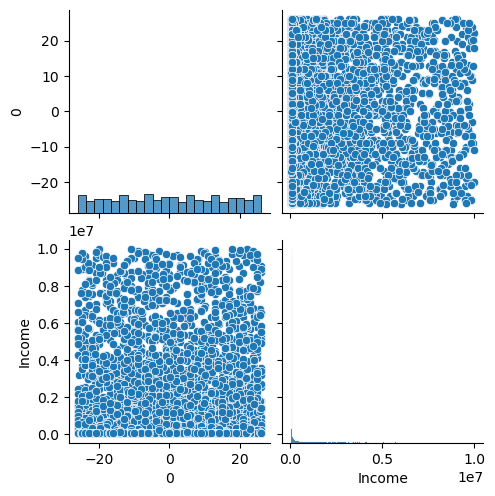

<Figure size 1500x1500 with 0 Axes>

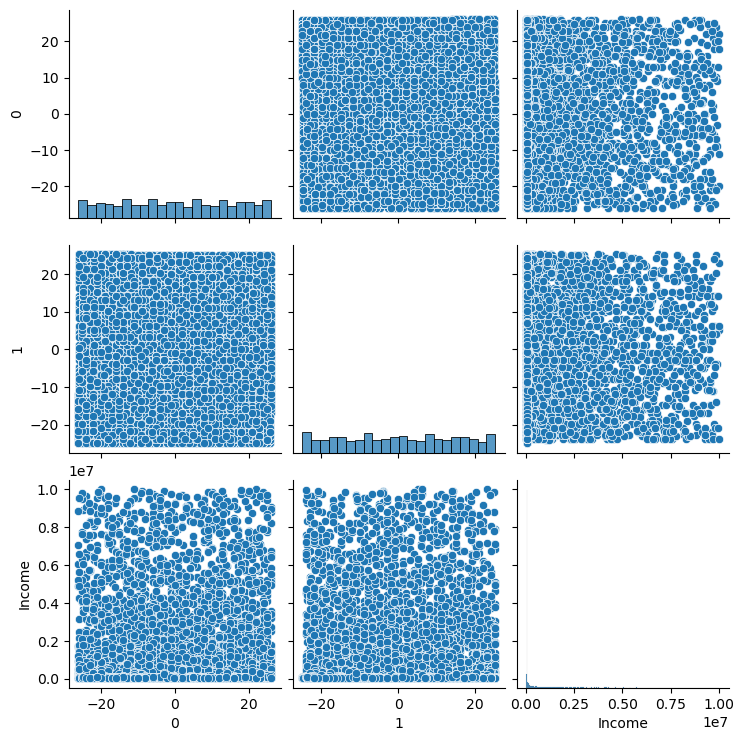

<Figure size 1500x1500 with 0 Axes>

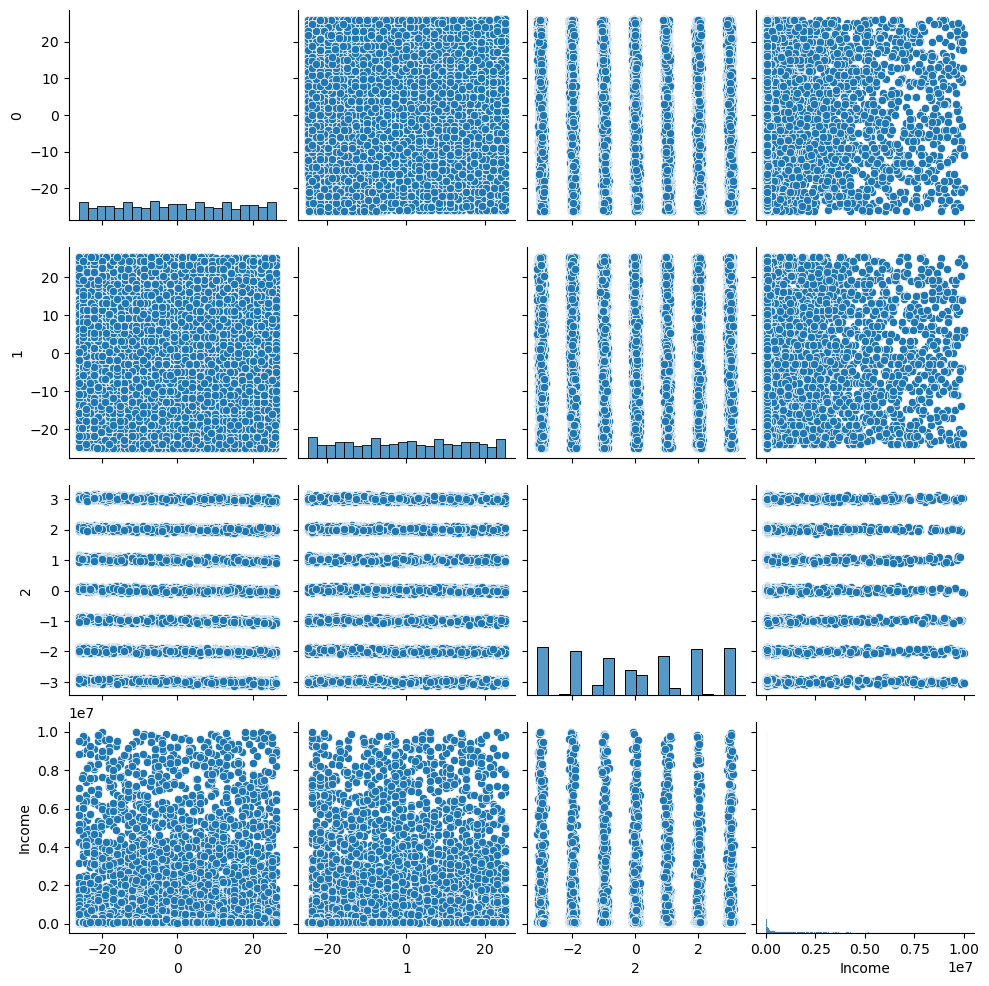

<Figure size 1500x1500 with 0 Axes>

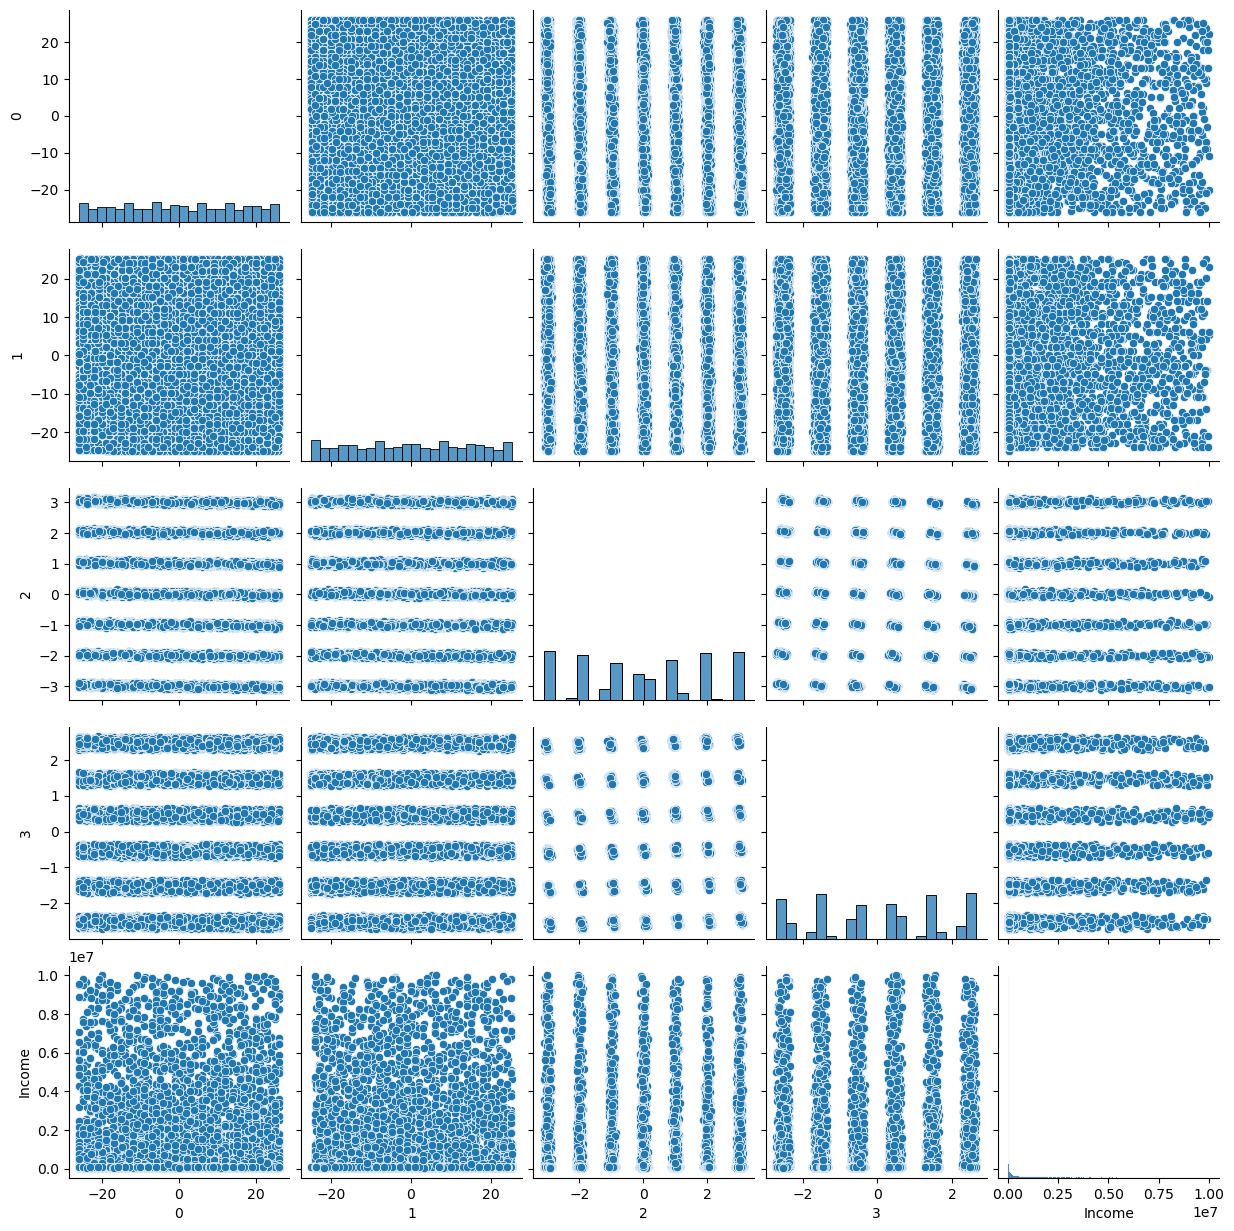

<Figure size 1500x1500 with 0 Axes>

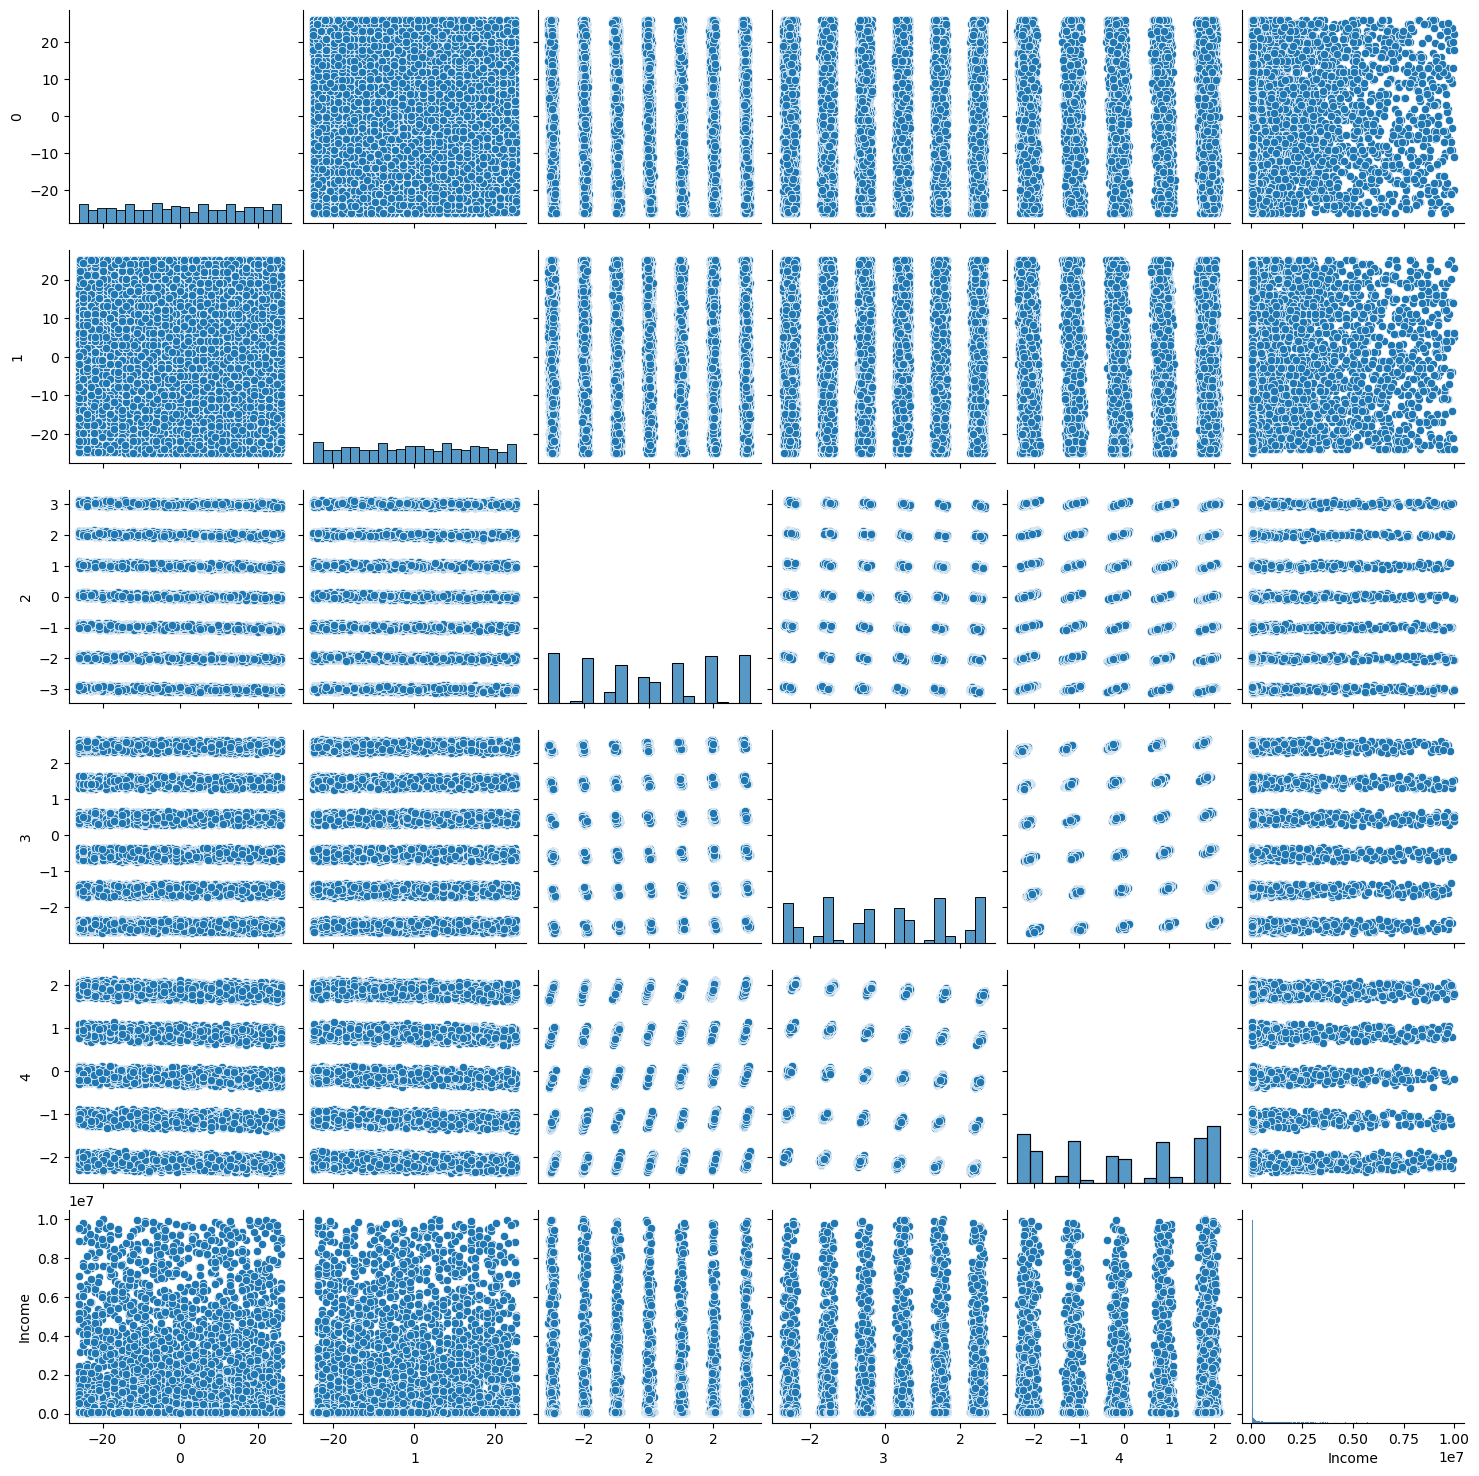

<Figure size 1500x1500 with 0 Axes>

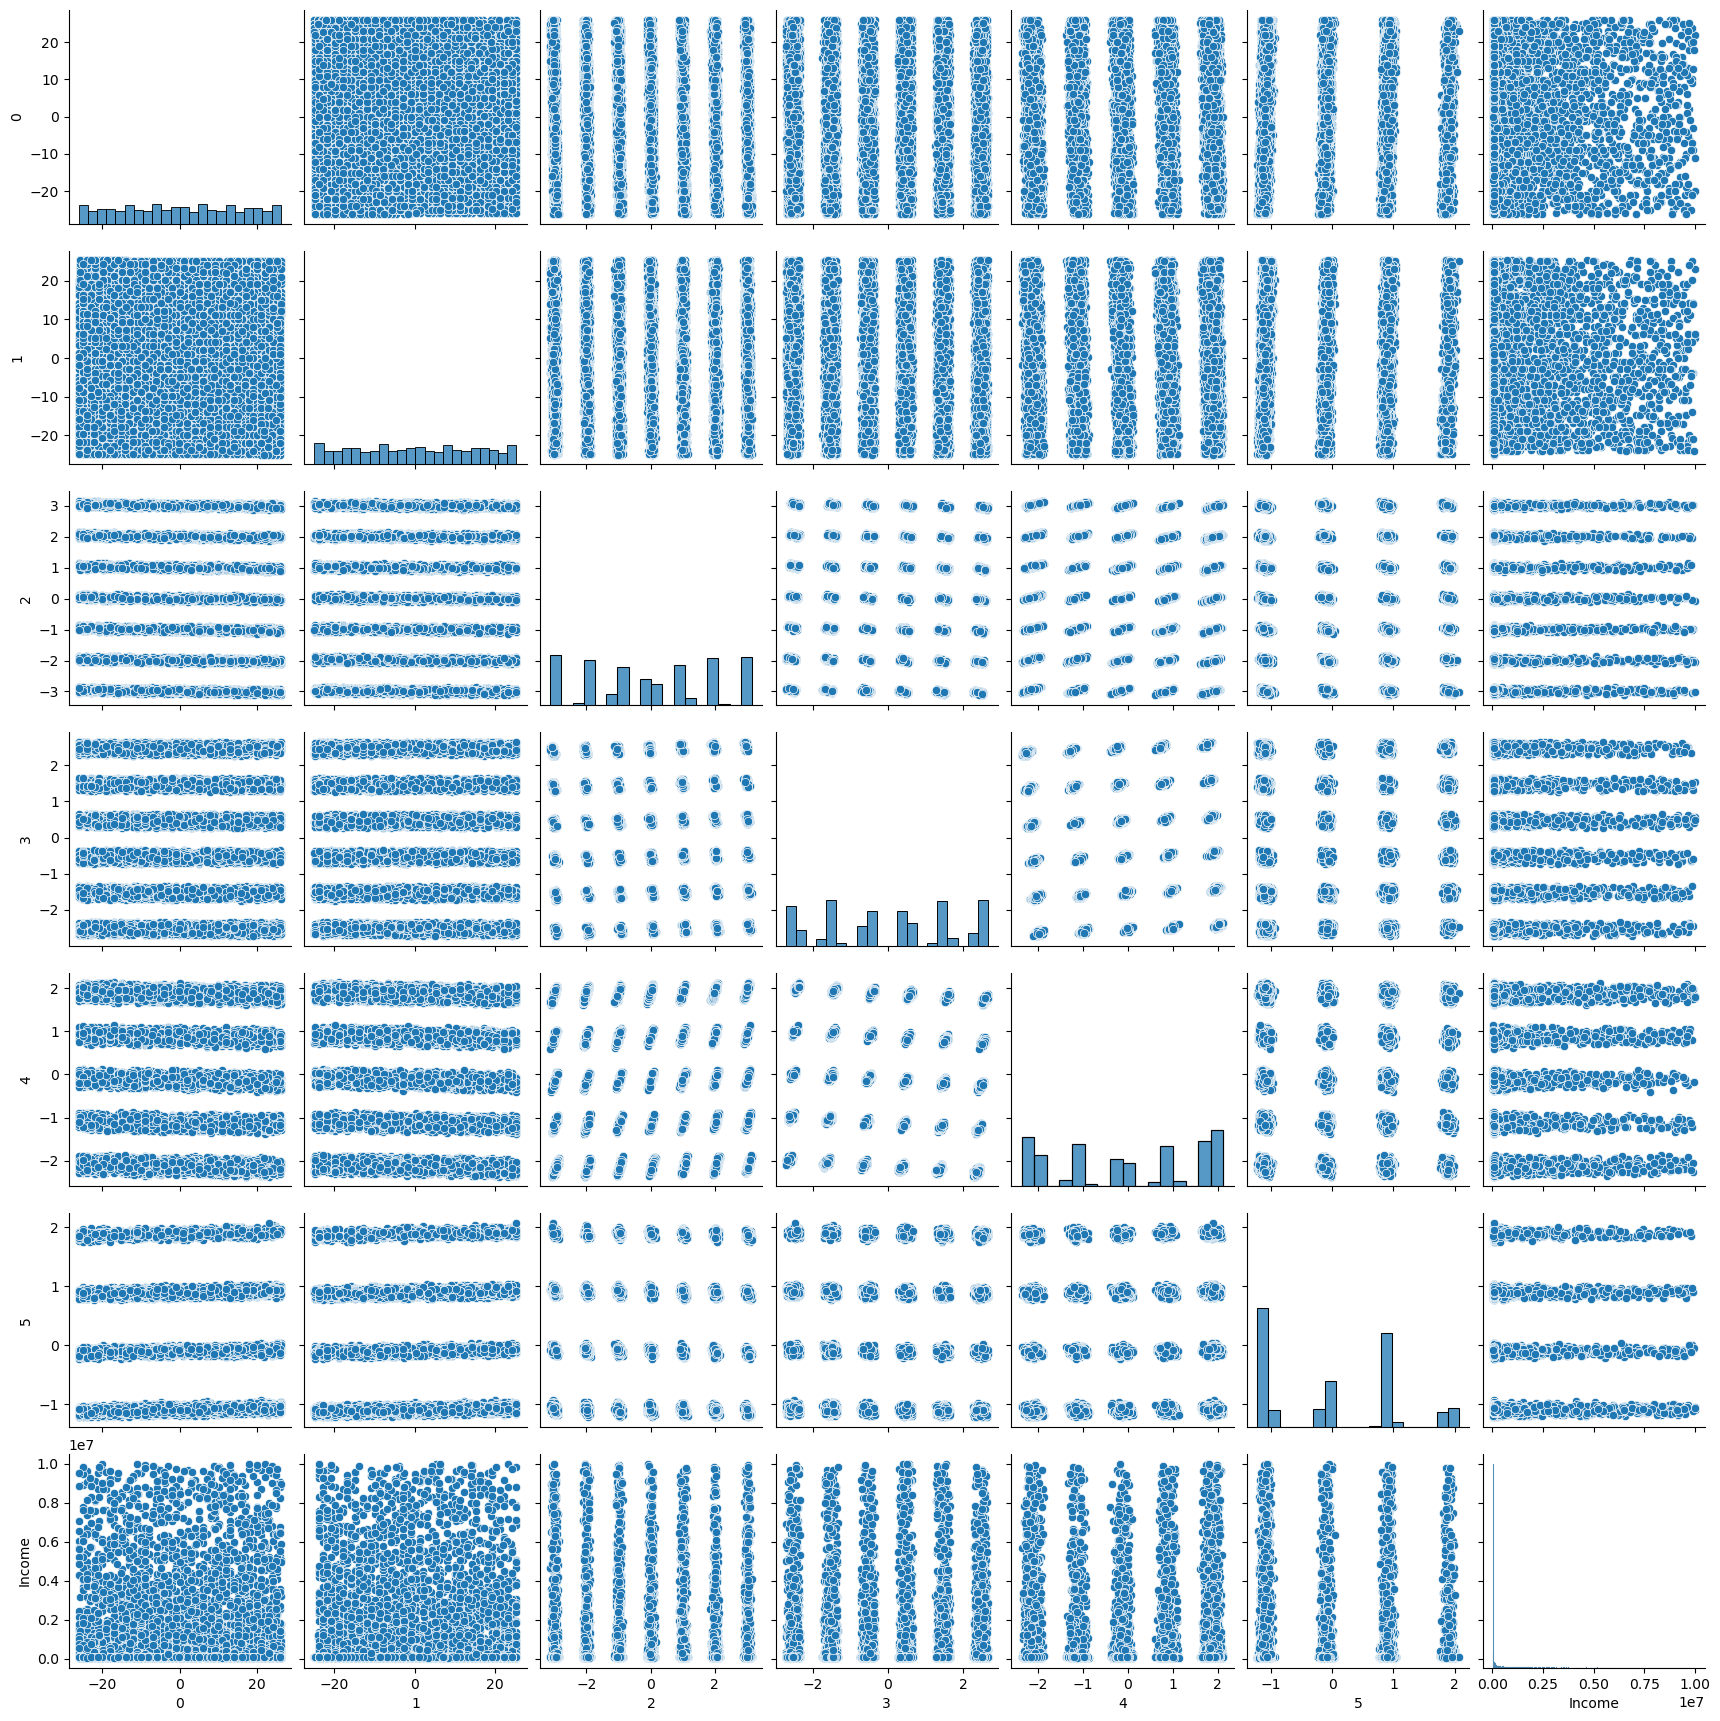

<Figure size 1500x1500 with 0 Axes>

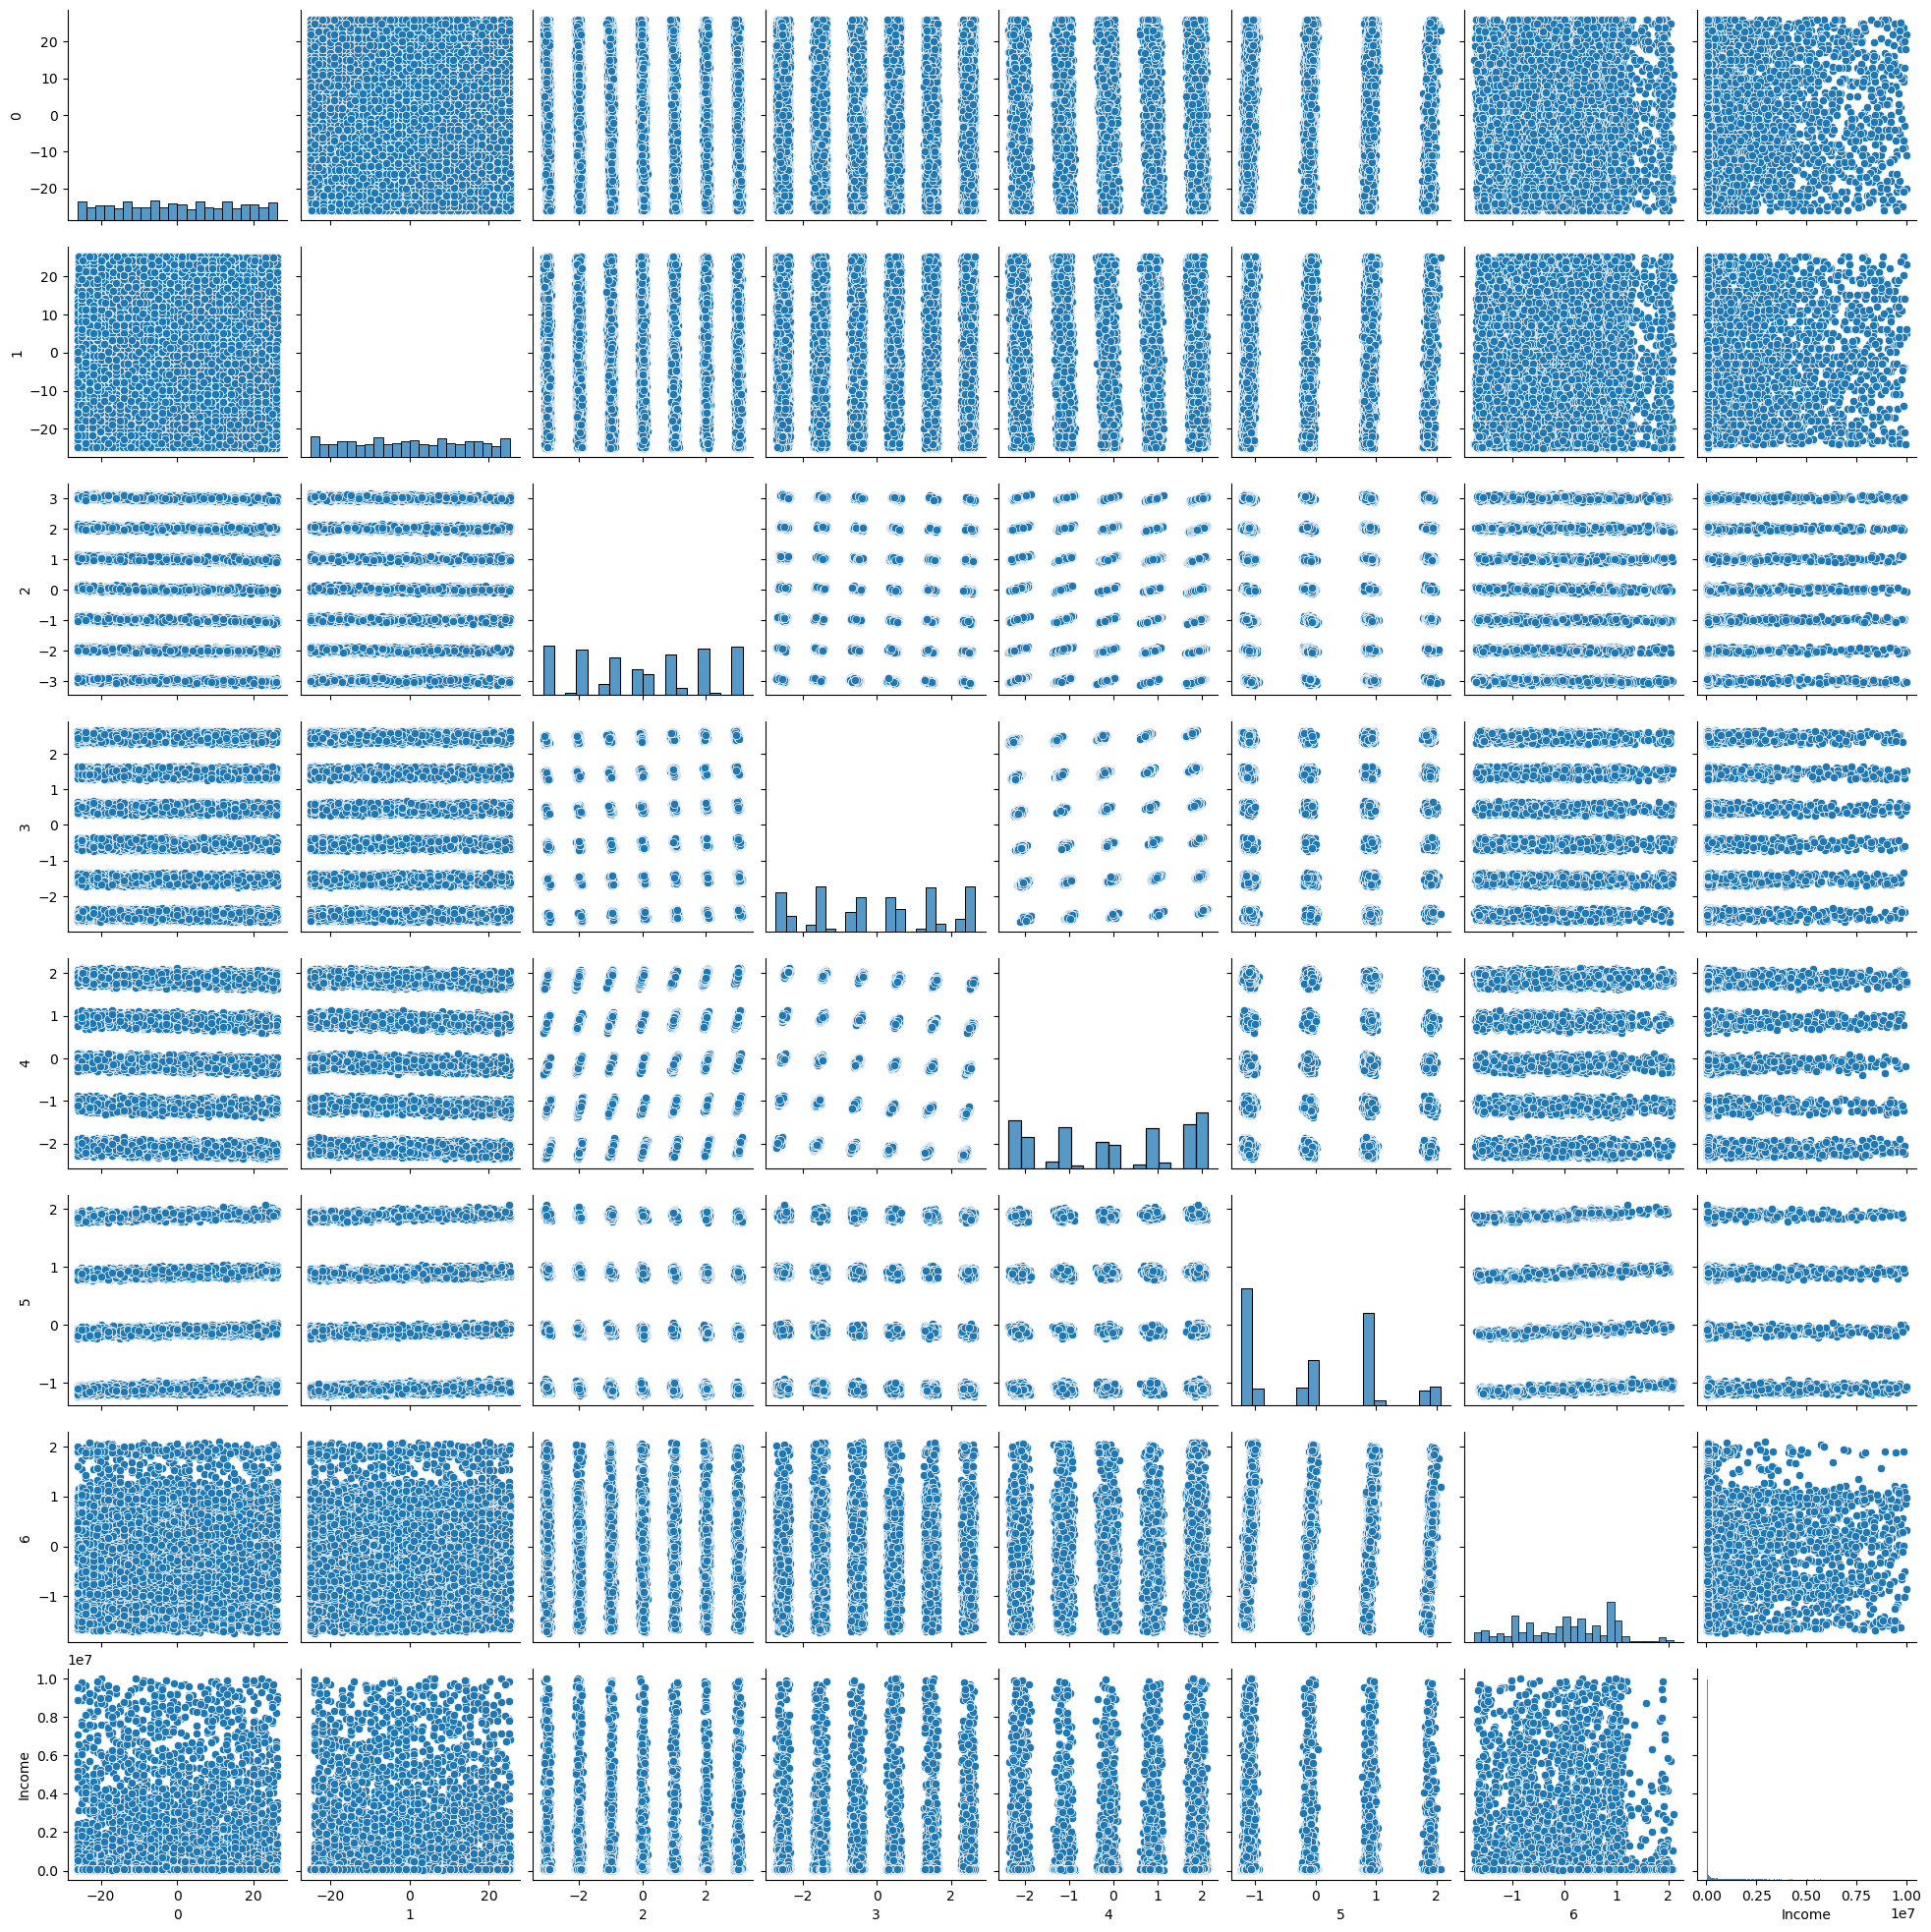

In [41]:
# n_comp = 0
pca_data = household_data.drop('Income' ,axis = 1)
for i in range(pca_data.shape[1]):
    pca = PCA(n_components = i + 1)
    house_pca = pca.fit_transform(pca_data)
    df_house_pca = pd.DataFrame(house_pca)
    df_house_pca['Income'] = household_data['Income']
    plt.figure(figsize= (15,15))
    sns.pairplot(df_house_pca)
    plt.savefig(f'E:\\D_S_project\\linear_regressioin\\visualization\\pca_{i}' ,dpi = 300 , bbox_inches = 'tight' )
    print('fig printed')
    # plt.show()

      Age  Education_Level  Occupation  Number_of_Dependents  Location  \
0      56              0.0         0.0                     5       0.0   
1      69              1.0         1.0                     0       0.0   
2      46              2.0         0.0                     1       0.0   
3      32              1.0         2.0                     2       0.0   
4      60              2.0         1.0                     3       0.0   
...   ...              ...         ...                   ...       ...   
9995   58              1.0         2.0                     0       2.0   
9996   23              0.0         0.0                     3       0.0   
9997   41              3.0         3.0                     3       0.0   
9998   44              1.0         3.0                     0       0.0   
9999   37              1.0         4.0                     0       2.0   

      Work_Experience  Marital_Status  Employment_Status  Household_Size  \
0                  21             0

<Figure size 1500x1500 with 0 Axes>

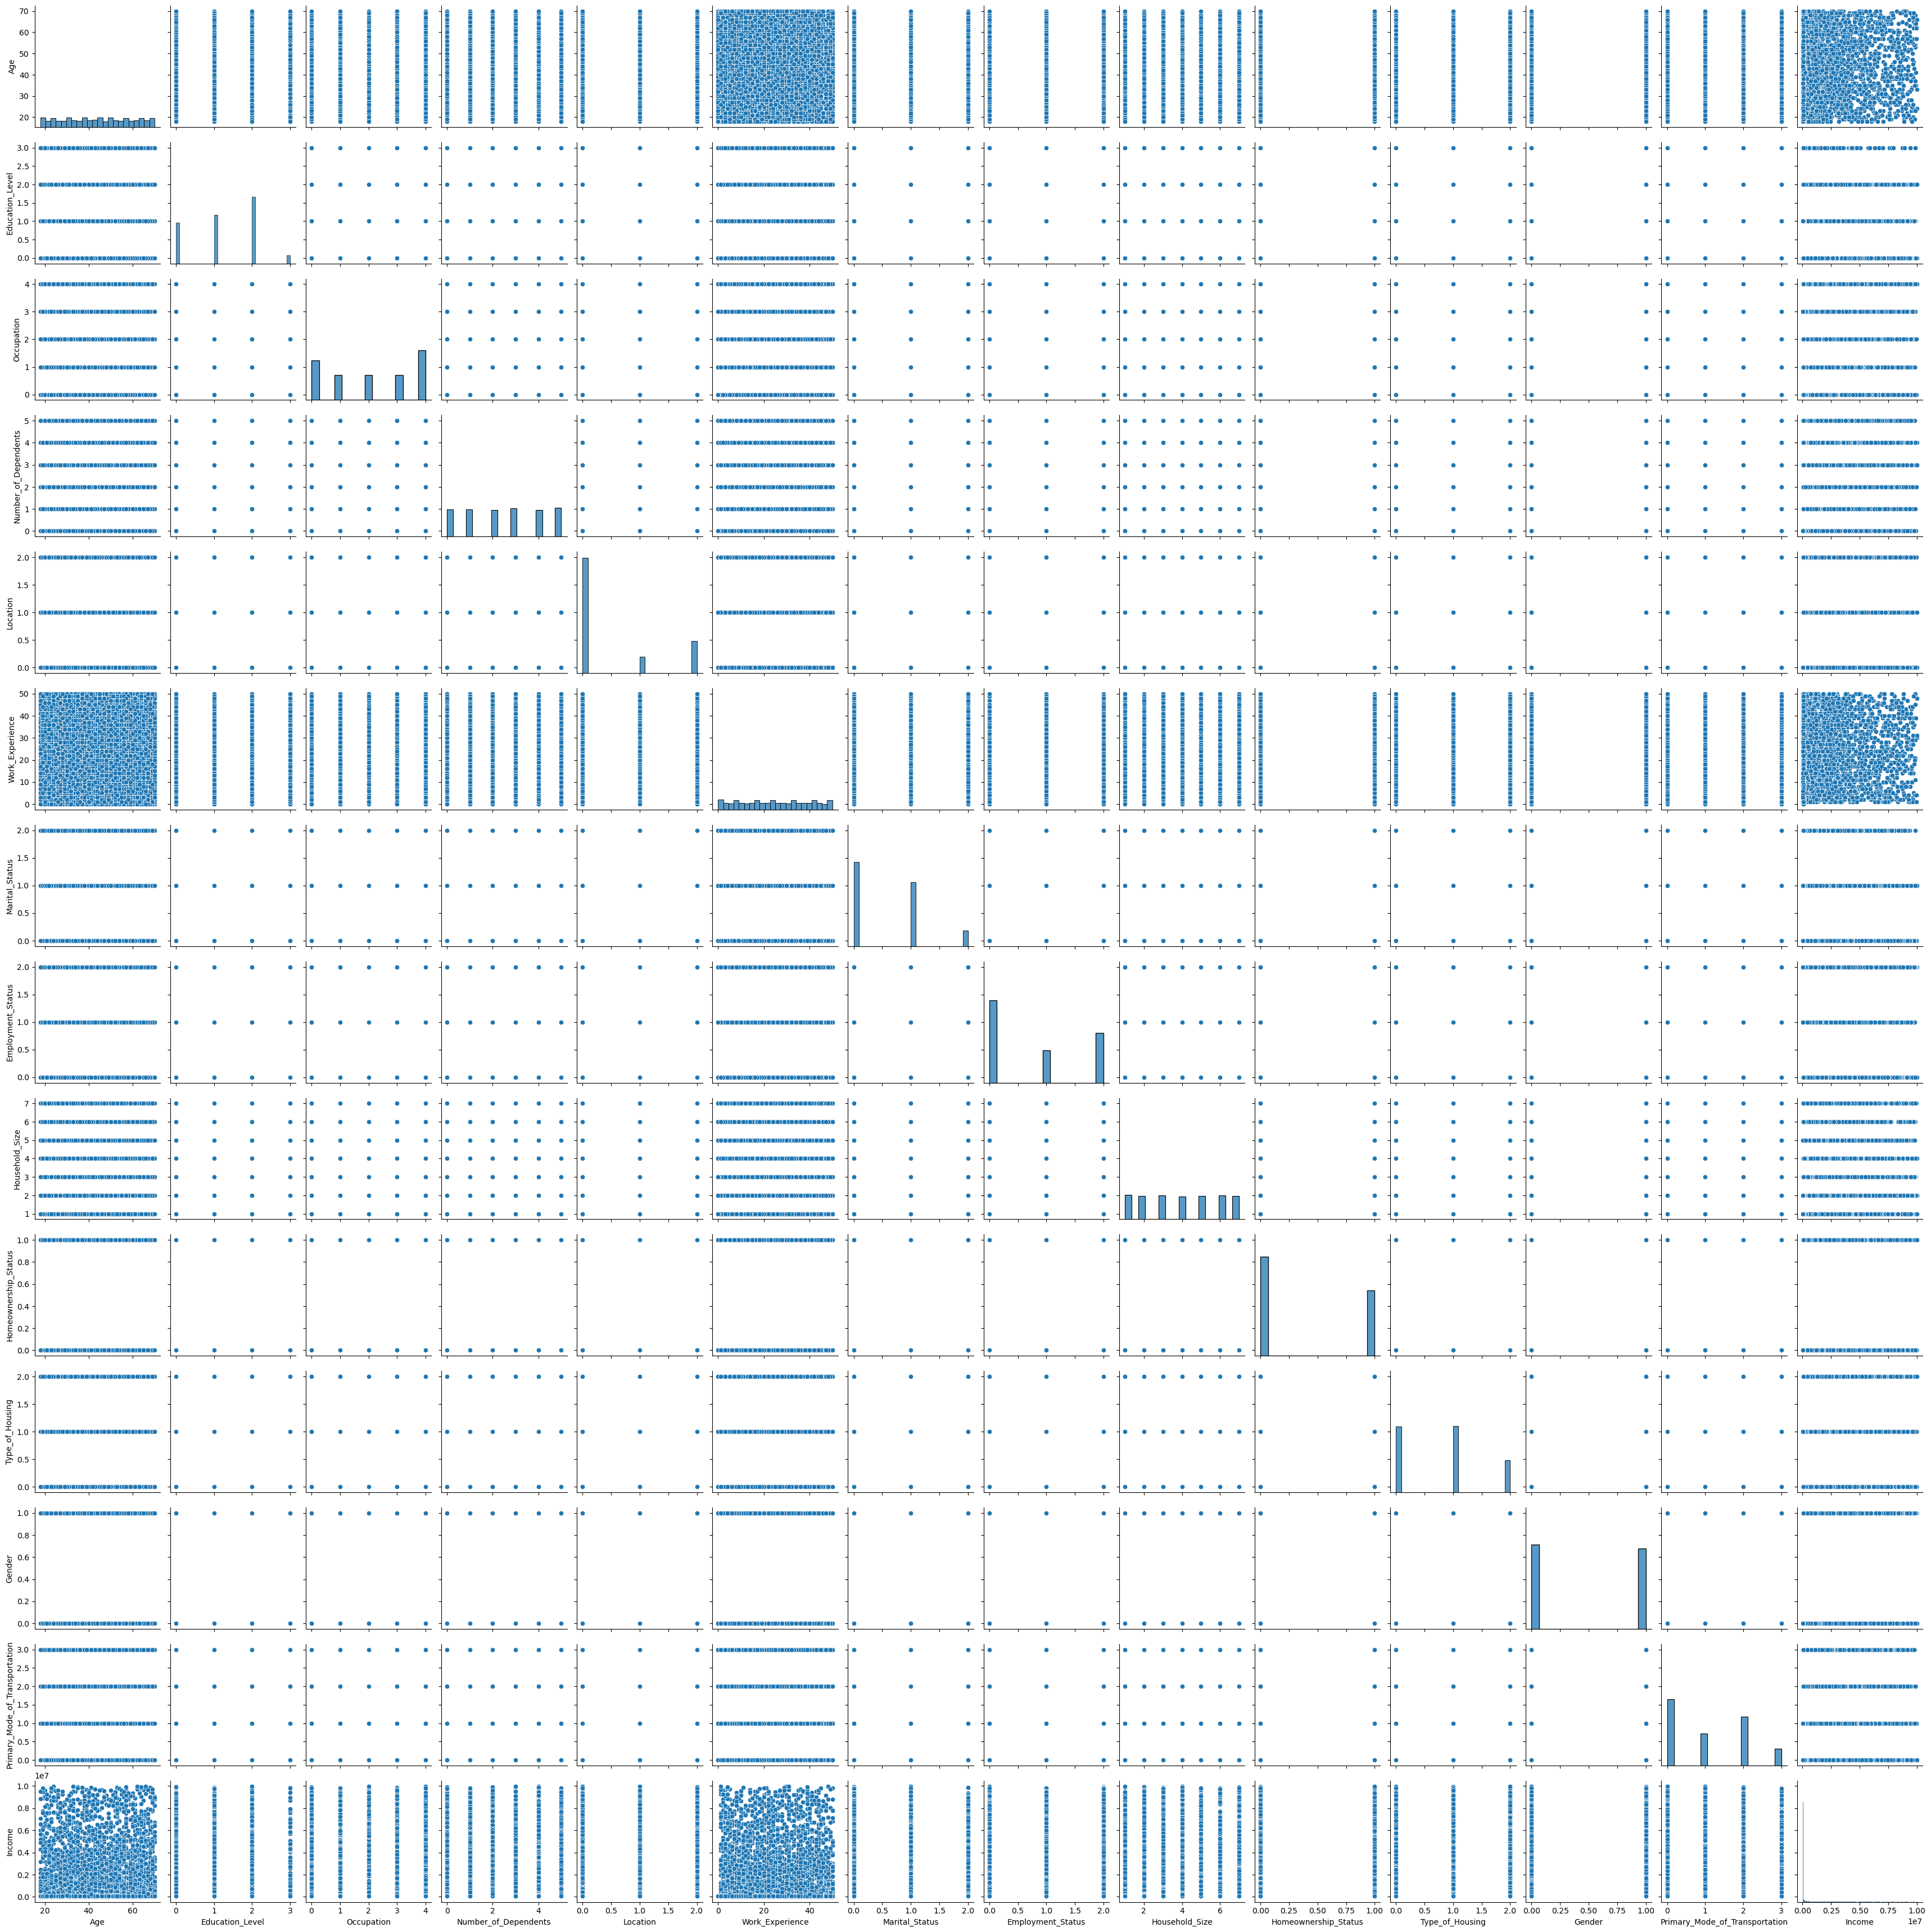

figure saved


In [45]:
def pca_data(data,n_component):
    pca = PCA(n_components = n_component)
    house_pca = pca.fit_transform(data)
    df_house_pca = pd.DataFrame(house_pca)
    return df_house_pca


def pairplot(data):
    plt.figure(figsize= (15,15))
    sns.pairplot(data)
    plt.savefig(f'E:\\D_S_project\\linear_regressioin\\visualization\\pca' ,dpi = 300 , bbox_inches = 'tight' )
    plt.show()
    print('figure saved')

# pca_1_feature = household_data
# print(pca_1_feature)
# pca_1 = pca_data(pca_1_feature,1)
# pca_1['Income'] = household_data['Income']
# pairplot(pca_1)
print(household_data)
pairplot(household_data)

In [ ]:
pca_data

In [ ]:
pca.explained_variance_ratio_

In [ ]:
plt.figure(figsize= (15,15))
sns.pairplot(df_house_pca)
plt.savefig('E:\\D_S_project\\linear_regressioin\\visualization\\pairplot of household data after ordinal encoding.png' ,dpi = 300 , bbox_inches = 'tight' )
plt.show()